## Breast Cancer Prediction - Using Logistic regression

Hello Kagglers,

Welcome to my first kernel on Kaggle. In this notebook, I analyse the Breast Cancer dataset and develop a Logistic Regression model to try classifying suspected cells to either Benign or Malignant.

In [49]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#import pandas 
import pandas as pd

#import numpy
import numpy as np

#import seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

#import statsmodel 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,roc_auc_score

In [50]:
# Changing to show more rows for visual analysis
pd.set_option('display.max_rows', 500)
# Changing display format to not show scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Displaying all columns
pd.set_option('display.max_columns', 500)

In [51]:
#import data
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [52]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,nan


In [53]:
data.shape

(569, 33)

In [54]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,nan
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,nan
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,nan
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,nan
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,nan
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,nan
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,nan


### Data Cleaning and preparation

In [55]:
#Function to calculate the missing value percent in DataFrame columns - As we are goining to do it frequently
def missingValues(df):
   missingcontent=round(df.isnull().sum()/len(df) *100,2)
   print("Total Missing Value Percentage in dataframe: ",round(missingcontent.mean(),2))
   print(missingcontent[missingcontent>0].sort_values(ascending=False))

In [56]:
#null value percentage in data
missingValues(data)

Total Missing Value Percentage in dataframe:  3.03
Unnamed: 32   100.00
dtype: float64


dropping 'Unnamed: 32' - since its holding null values 100% and 'id' as well - since doesn't hold any significance

In [57]:
data.drop(columns=['id','Unnamed: 32'],inplace=True)

In [58]:
#null value percentage in data
missingValues(data)

Total Missing Value Percentage in dataframe:  0.0
Series([], dtype: float64)


In [59]:
# 'Diagnosis' count details
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

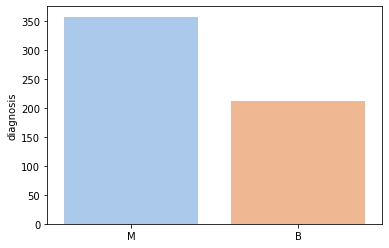

In [60]:
sns.barplot(y=data['diagnosis'].value_counts(),x=data['diagnosis'].unique(),palette="pastel")

finding correlations using the heatmap

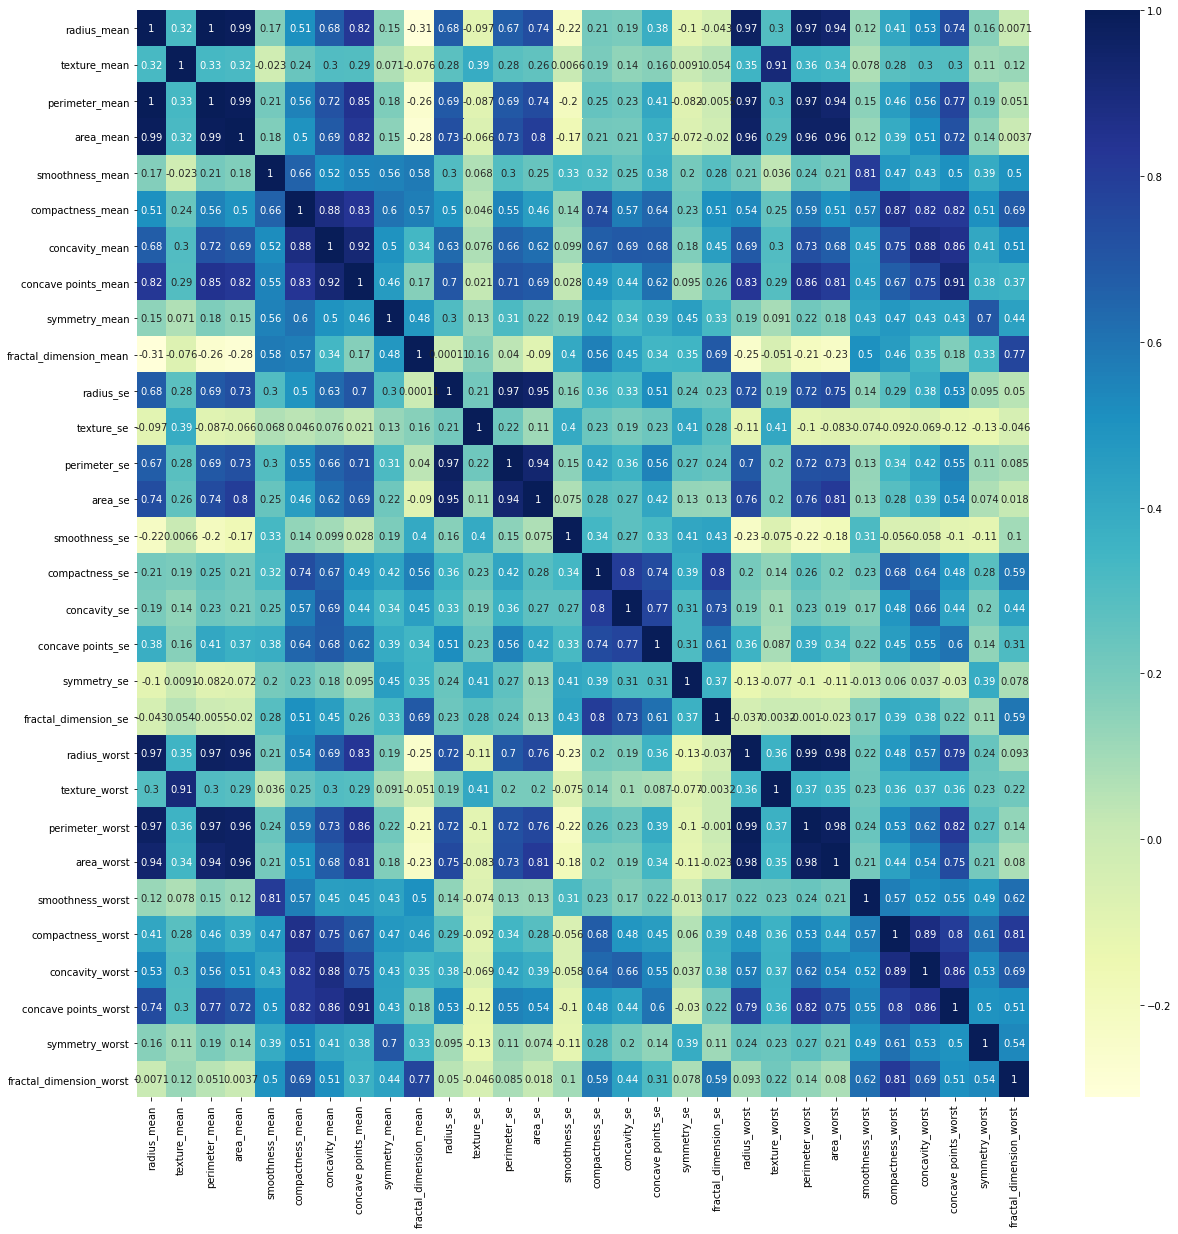

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

Observation:
    
   - all the `worst` scenerios data is highly correlated with the `mean` data
   - Ex: `radius_mean` is highly correlated with `radius_worst` 
   - similarly `radius_se` with 'perimeter_se' & 'area_se'
   - High correlation exists between many variables
   

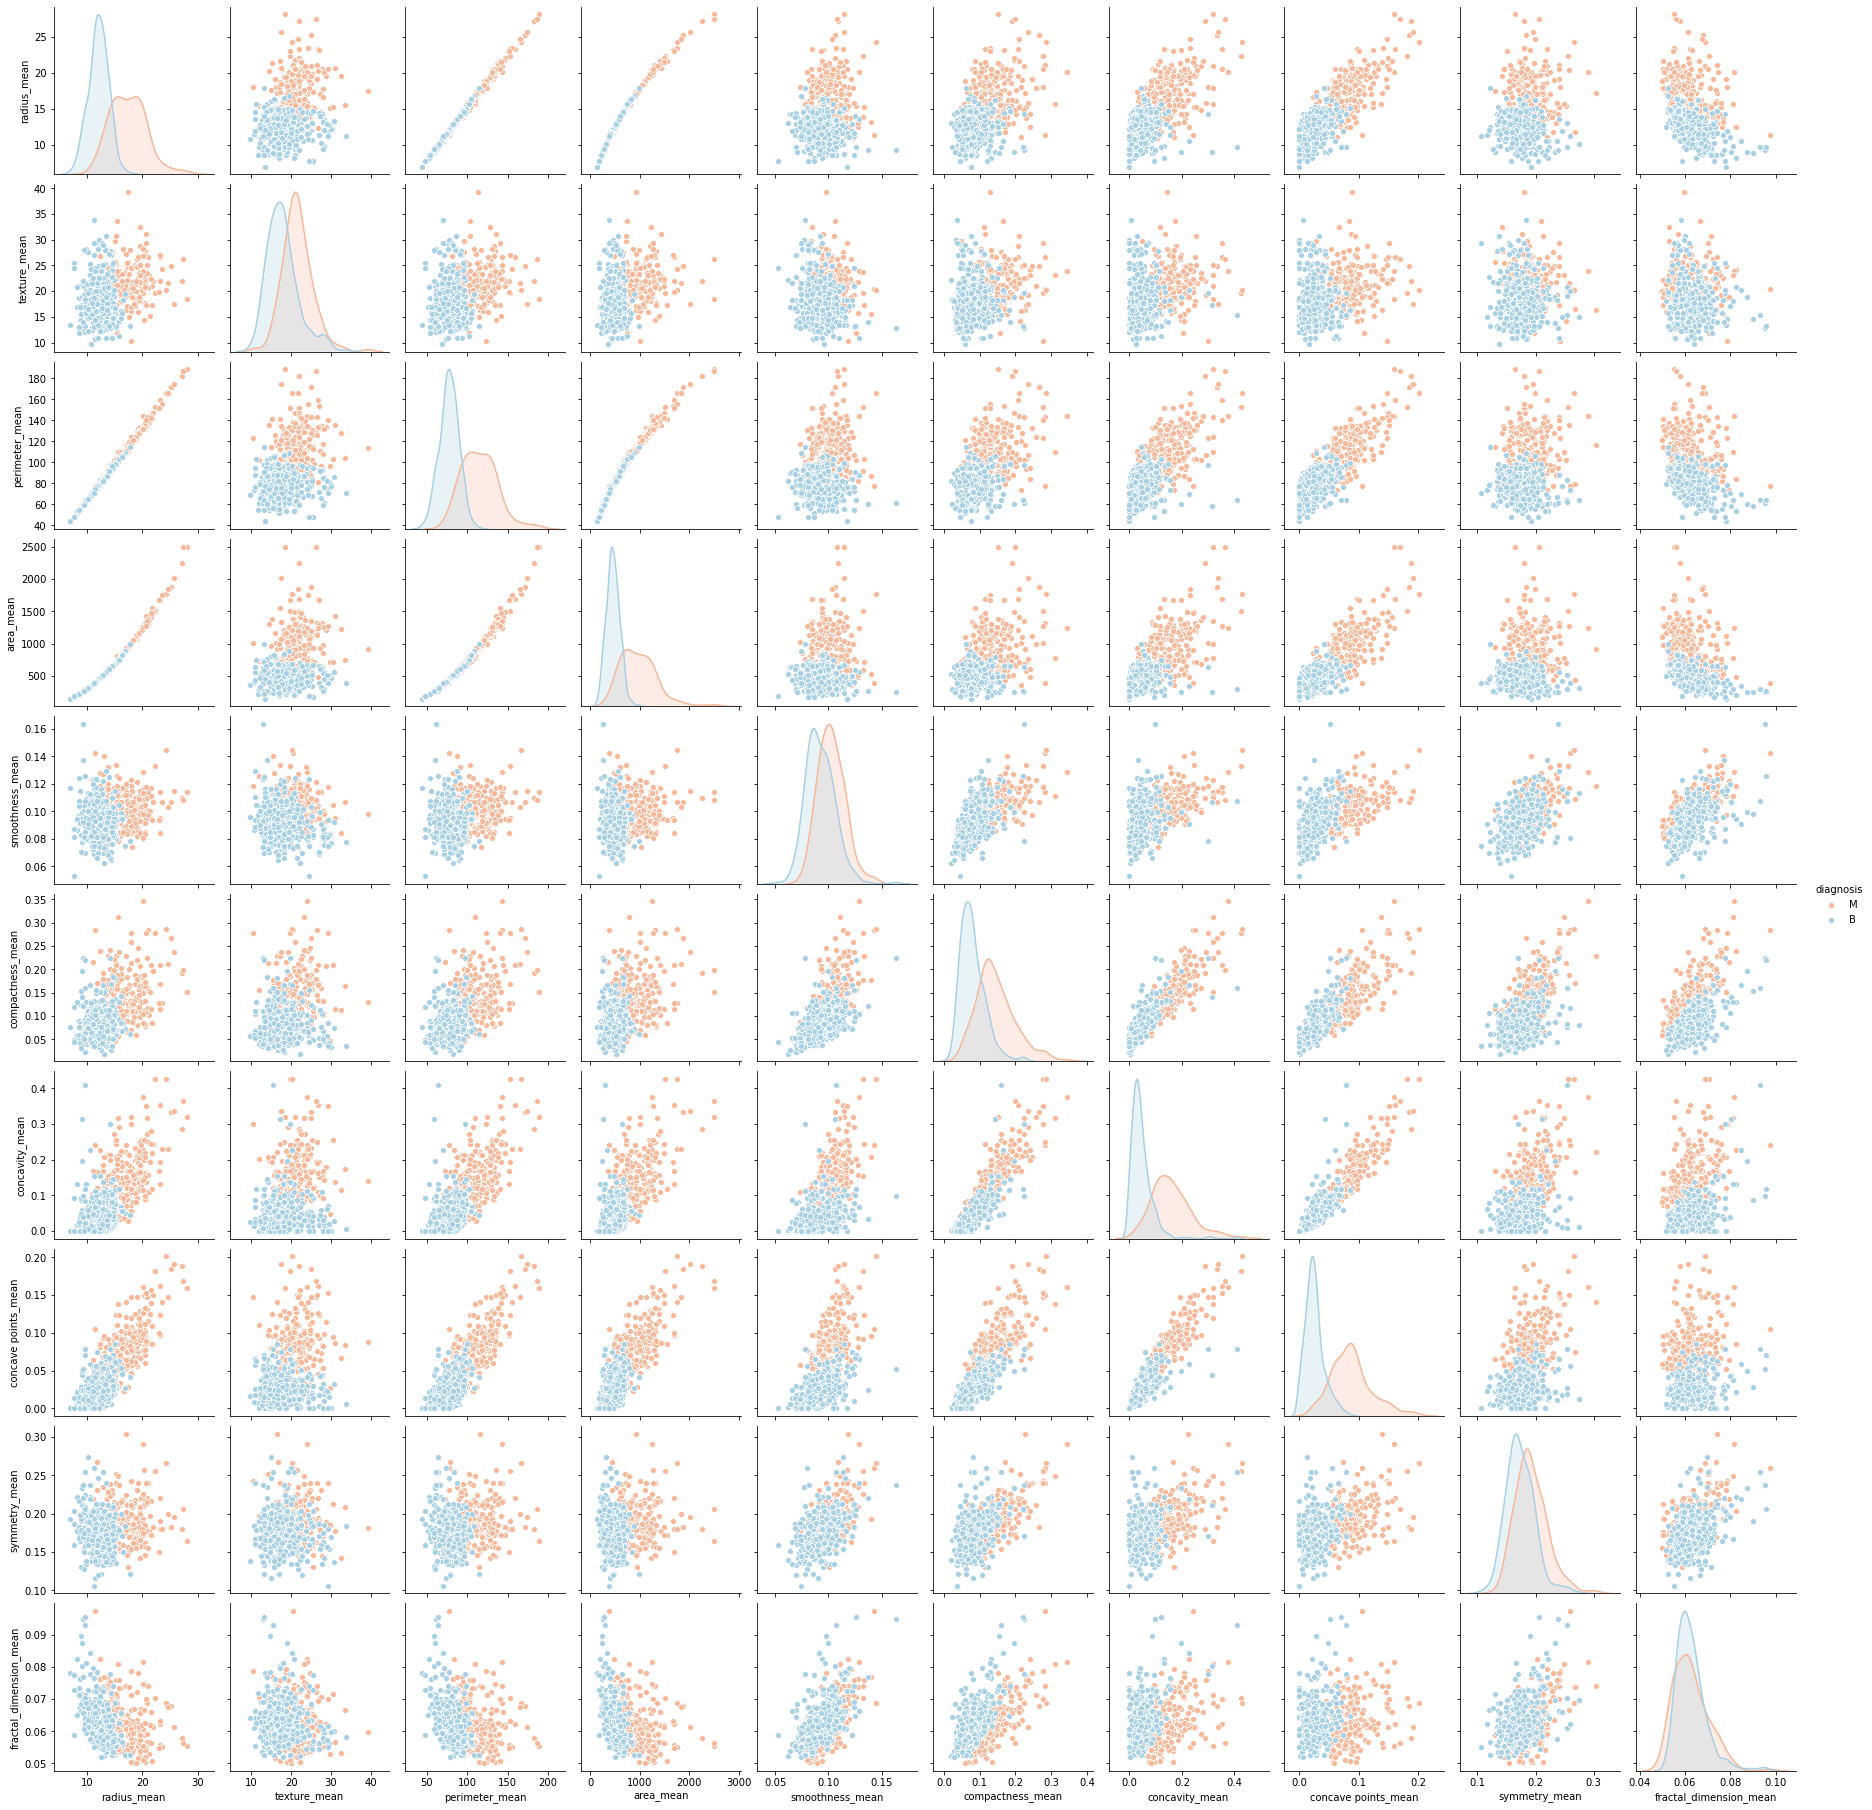

In [62]:
# generate a pair plot with the "mean" columns alone
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=data[cols], hue='diagnosis', palette='RdBu')

Observation:
    
   - `radius_mean` is highly correlated with 'perimeter_mean', 'area_mean'
   - `compactness_mean` is similar to 'concavity_mean' & 'concave_points_mean'

Lets' drop the cols, which we have stated above as highly correlated

In [63]:
#cols to be dropped inorder to handle the multicollinearity between the variables
cols= ['perimeter_se', 'area_se',
       'perimeter_mean','area_mean',
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',
       'concavity_mean',
       'concave points_mean',
       'concavity_se', 'concave points_se']

In [64]:
data.drop(columns=cols,axis=1,inplace=True)

In [65]:
#Our final columns for our model
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [66]:
#Binary map of 'M' & 'B' values in the diagnosis column 
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})

In [67]:
data.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,0.10,0.10,0.18,0.06,0.41,1.22,0.01,0.03,0.02,0.00
std,0.48,3.52,4.30,0.01,0.05,0.03,0.01,0.28,0.55,0.00,0.02,0.01,0.00
min,0.00,6.98,9.71,0.05,0.02,0.11,0.05,0.11,0.36,0.00,0.00,0.01,0.00
25%,0.00,11.70,16.17,0.09,0.06,0.16,0.06,0.23,0.83,0.01,0.01,0.02,0.00
50%,0.00,13.37,18.84,0.10,0.09,0.18,0.06,0.32,1.11,0.01,0.02,0.02,0.00
75%,1.00,15.78,21.80,0.11,0.13,0.20,0.07,0.48,1.47,0.01,0.03,0.02,0.00
max,1.00,28.11,39.28,0.16,0.35,0.30,0.10,2.87,4.88,0.03,0.14,0.08,0.03


Observation:
    
   - Let's rescale the values later inorder to have cofficients of same scale

#### Splitting the data to X,y DataSets

In [68]:
y = data.pop('diagnosis')
X= data

In [69]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,0.12,0.28,0.24,0.08,1.09,0.91,0.01,0.05,0.03,0.01
1,20.57,17.77,0.08,0.08,0.18,0.06,0.54,0.73,0.01,0.01,0.01,0.00
2,19.69,21.25,0.11,0.16,0.21,0.06,0.75,0.79,0.01,0.04,0.02,0.00
3,11.42,20.38,0.14,0.28,0.26,0.10,0.50,1.16,0.01,0.07,0.06,0.01
4,20.29,14.34,0.10,0.13,0.18,0.06,0.76,0.78,0.01,0.02,0.02,0.01


Test and Train Dataset Split

In [70]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 100)

In [71]:
print('X_Train Dataset: ',X_train.shape)
print('y_Train Dataset: ',y_train.shape)
print('X_Test Dataset: ',X_test.shape)
print('y_Test Dataset: ',y_test.shape)

X_Train Dataset:  (455, 12)
y_Train Dataset:  (455,)
X_Test Dataset:  (114, 12)
y_Test Dataset:  (114,)


#### Feature Rescaling

Normalising the numerical columns using Min Max scaler

In [72]:
#data normalization using sklearn MinMaxScaler
scaler = MinMaxScaler()

In [73]:
cols = X_train.columns

In [74]:
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [75]:
X_train.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
count,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00
mean,0.33,0.31,0.39,0.29,0.44,0.28,0.10,0.19,0.18,0.17,0.24,0.13
std,0.16,0.15,0.12,0.17,0.16,0.15,0.09,0.12,0.10,0.13,0.15,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.20,0.31,0.16,0.33,0.18,0.04,0.11,0.12,0.08,0.14,0.06
50%,0.30,0.29,0.39,0.25,0.43,0.26,0.08,0.17,0.16,0.14,0.20,0.11
75%,0.41,0.40,0.47,0.38,0.53,0.36,0.13,0.25,0.22,0.22,0.30,0.16
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Logistic Regression model

In [76]:
# Logistic regression model using statsmodel
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      442
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61.353
Date:                Wed, 23 Sep 2020   Deviance:                       122.71
Time:                        05:29:20   Pearson chi2:                     226.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -21.6487      3.654     -5.925      0.000     -28.810     -14.488
radius_mean               24.6500      6.025      4.091      0.000      12.841      36.459
texture_mean              13.5730      2.569      5.283      0.000       8.537      18.609
smoothness_mean            8.3514      4.145      2.015      0.044       0.227      16.476
compactness_mean           6.9607      6.128      1.136      0.256      -5.050      18.971
symmetry_mean              6.5473      2.679      2.444      0.015       1.296      11.799
fractal_dimension_mean     2.2779      5.392      0.422      0.673      -8.290      12.846
radius_se                 18.1112      7.342      2.467      0.014       3.720      32.502
texture_se                -2.3062      3.176     -0.726      0.468      -8.532       3.919
smoothness_se              1.2963      3.222      0.402      0.687      -5.019       7.611
compactness_se             2.3762      5.444      0.436      0.662      -8.294      13.046
symmetry_se               -4.4601      2.692     -1.657      0.098      -9.735       0.815
fractal_dimension_se     -14.2442      7.783     -1.830      0.067     -29.498       1.009
==========================================================================================
"""

In [77]:
#Function to calculate VIF values
def VIF_values(X_train):
    vif = pd.DataFrame()
    X= X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [78]:
VIF_values(X_train)

                  Features   VIF
2          smoothness_mean 30.35
3         compactness_mean 28.68
5   fractal_dimension_mean 24.31
9           compactness_se 19.59
4            symmetry_mean 16.56
0              radius_mean 15.52
11    fractal_dimension_se 12.68
8            smoothness_se  7.84
1             texture_mean  7.44
10             symmetry_se  6.68
7               texture_se  5.88
6                radius_se  5.38


Observation:
    
   - `smoothness_mean` has high VIF indicating the multicollinearity

In [79]:
#dropping the 'smoothness_mean' from the model
X_train = X_train.drop(columns='smoothness_mean',axis=1)

In [80]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      443
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.537
Date:                Wed, 23 Sep 2020   Deviance:                       127.07
Time:                        05:29:20   Pearson chi2:                     225.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -19.0887      3.044     -6.270      0.000     -25.055     -13.122
radius_mean               22.7804      5.604      4.065      0.000      11.797      33.764
texture_mean              11.9966      2.337      5.134      0.000       7.417      16.576
compactness_mean          11.7348      5.618      2.089      0.037       0.723      22.746
symmetry_mean              7.2320      2.447      2.955      0.003       2.435      12.029
fractal_dimension_mean     3.3512      5.227      0.641      0.521      -6.894      13.597
radius_se                 20.0186      7.096      2.821      0.005       6.111      33.926
texture_se                -1.9040      3.192     -0.597      0.551      -8.160       4.352
smoothness_se              3.8140      2.854      1.336      0.181      -1.780       9.408
compactness_se            -1.0692      4.716     -0.227      0.821     -10.312       8.174
symmetry_se               -4.7991      2.583     -1.858      0.063      -9.862       0.264
fractal_dimension_se     -14.0419      7.216     -1.946      0.052     -28.186       0.102
==========================================================================================
"""

In [81]:
VIF_values(X_train)

                  Features   VIF
2         compactness_mean 27.11
4   fractal_dimension_mean 18.57
8           compactness_se 18.51
3            symmetry_mean 15.46
0              radius_mean 12.46
10    fractal_dimension_se 12.29
1             texture_mean  7.33
9              symmetry_se  6.68
7            smoothness_se  6.38
6               texture_se  5.82
5                radius_se  5.33


Observation:
    -`compactness_mean` has high VIF 

In [82]:
#dropping the 'compactness_mean' from the model
X_train = X_train.drop(columns='compactness_mean',axis=1)

In [83]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      444
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.948
Date:                Wed, 23 Sep 2020   Deviance:                       131.90
Time:                        05:29:20   Pearson chi2:                     204.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -21.6406      2.947     -7.344      0.000     -27.416     -15.865
radius_mean               30.4561      4.673      6.518      0.000      21.298      39.614
texture_mean              12.3048      2.262      5.439      0.000       7.871      16.739
symmetry_mean              8.6613      2.343      3.697      0.000       4.070      13.253
fractal_dimension_mean    12.6362      2.991      4.225      0.000       6.774      18.498
radius_se                 20.9809      6.979      3.006      0.003       7.303      34.659
texture_se                -2.3608      3.075     -0.768      0.443      -8.388       3.666
smoothness_se              2.6588      2.832      0.939      0.348      -2.893       8.210
compactness_se             5.0042      3.711      1.348      0.178      -2.269      12.278
symmetry_se               -6.2057      2.474     -2.508      0.012     -11.055      -1.356
fractal_dimension_se     -17.1528      6.946     -2.469      0.014     -30.767      -3.539
==========================================================================================
"""

In [84]:
# feature variables and their corresponding VIFs
VIF_values(X_train)

                 Features   VIF
2           symmetry_mean 15.07
3  fractal_dimension_mean 11.26
9    fractal_dimension_se 10.71
7          compactness_se 10.22
0             radius_mean 10.05
1            texture_mean  7.32
8             symmetry_se  6.18
6           smoothness_se  5.73
5              texture_se  5.70
4               radius_se  4.74


Observation: 
 - `symmetry_mean` has high VIF of 15.07

In [85]:
#dropping the 'symmetry_mean' from the model
X_train = X_train.drop(columns='symmetry_mean',axis=1)

In [86]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      445
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -74.010
Date:                Wed, 23 Sep 2020   Deviance:                       148.02
Time:                        05:29:20   Pearson chi2:                     193.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.8760      2.280     -7.839      0.000     -22.346     -13.406
radius_mean               27.4906      4.099      6.706      0.000      19.456      35.525
texture_mean              10.4763      2.010      5.213      0.000       6.538      14.415
fractal_dimension_mean    15.4992      2.812      5.512      0.000       9.988      21.011
radius_se                 23.4471      6.615      3.545      0.000      10.482      36.412
texture_se                -3.4166      3.004     -1.137      0.255      -9.304       2.471
smoothness_se              2.2716      2.909      0.781      0.435      -3.430       7.974
compactness_se             6.7128      3.695      1.816      0.069      -0.530      13.956
symmetry_se               -1.2108      1.986     -0.610      0.542      -5.104       2.682
fractal_dimension_se     -20.3446      6.163     -3.301      0.001     -32.424      -8.266
==========================================================================================
"""

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF_values(X_train)

                 Features   VIF
6          compactness_se 10.16
8    fractal_dimension_se 10.06
0             radius_mean  7.97
1            texture_mean  7.30
2  fractal_dimension_mean  7.13
5           smoothness_se  5.72
4              texture_se  5.70
7             symmetry_se  5.14
3               radius_se  4.72


Observation:
   - `compactness_se` has high VIF`10.16`

In [88]:
#dropping the 'compactness_se' from the model
X_train = X_train.drop(columns='compactness_se',axis=1)

In [89]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      446
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75.820
Date:                Wed, 23 Sep 2020   Deviance:                       151.64
Time:                        05:30:47   Pearson chi2:                     181.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -18.4266      2.269     -8.122      0.000     -22.873     -13.980
radius_mean               29.2984      4.050      7.235      0.000      21.361      37.235
texture_mean              10.6571      1.969      5.412      0.000       6.797      14.517
fractal_dimension_mean    15.9314      2.742      5.811      0.000      10.558      21.305
radius_se                 20.5520      6.039      3.403      0.001       8.716      32.388
texture_se                -3.4729      2.841     -1.222      0.222      -9.042       2.096
smoothness_se              2.4408      2.864      0.852      0.394      -3.173       8.054
symmetry_se                0.0123      1.902      0.006      0.995      -3.716       3.741
fractal_dimension_se     -12.9506      3.900     -3.321      0.001     -20.594      -5.308
==========================================================================================
"""

Observation:
   - `symmetry_se` has high P-value of `0.995`

In [90]:
#dropping the 'symmetry_se' from the model
X_train = X_train.drop(columns='symmetry_se',axis=1)

In [91]:
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      447
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75.820
Date:                Wed, 23 Sep 2020   Deviance:                       151.64
Time:                        05:31:50   Pearson chi2:                     181.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -18.4237      2.223     -8.286      0.000     -22.781     -14.066
radius_mean               29.2943      3.999      7.325      0.000      21.456      37.133
texture_mean              10.6560      1.962      5.430      0.000       6.810      14.502
fractal_dimension_mean    15.9296      2.727      5.840      0.000      10.584      21.275
radius_se                 20.5593      5.931      3.467      0.001       8.935      32.183
texture_se                -3.4705      2.819     -1.231      0.218      -8.995       2.054
smoothness_se              2.4411      2.865      0.852      0.394      -3.174       8.056
fractal_dimension_se     -12.9431      3.722     -3.478      0.001     -20.237      -5.649
==========================================================================================
"""

Observation:
   - `smoothness_se` has P_value of `0.394`

In [92]:
#dropping the 'smoothness_se' from the model
X_train = X_train.drop(columns='smoothness_se',axis=1)

In [93]:
X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      448
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.242
Date:                Wed, 23 Sep 2020   Deviance:                       152.48
Time:                        05:32:54   Pearson chi2:                     181.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -18.0011      2.140     -8.412      0.000     -22.195     -13.807
radius_mean               28.7024      3.895      7.368      0.000      21.068      36.337
texture_mean              10.6243      1.960      5.420      0.000       6.783      14.466
fractal_dimension_mean    15.6228      2.585      6.044      0.000      10.556      20.689
radius_se                 21.3716      5.787      3.693      0.000      10.029      32.715
texture_se                -3.1157      2.724     -1.144      0.253      -8.454       2.223
fractal_dimension_se     -11.8220      3.152     -3.751      0.000     -17.999      -5.645
==========================================================================================
"""

Observation:
    -`texture_se` has p_value of `0.253`

In [94]:
#dropping the 'texture_se' from the model
X_train = X_train.drop(columns='texture_se',axis=1)

In [95]:
X_train_sm = sm.add_constant(X_train)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      449
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.938
Date:                Wed, 23 Sep 2020   Deviance:                       153.88
Time:                        05:33:36   Pearson chi2:                     180.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -18.5634      2.117     -8.770      0.000     -22.712     -14.415
radius_mean               30.2482      3.750      8.066      0.000      22.898      37.598
texture_mean               9.6137      1.731      5.555      0.000       6.221      13.006
fractal_dimension_mean    16.1467      2.575      6.272      0.000      11.101      21.193
radius_se                 18.7977      5.247      3.583      0.000       8.514      29.081
fractal_dimension_se     -12.8003      3.100     -4.130      0.000     -18.875      -6.725
==========================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF_values(X_train)

                 Features  VIF
0             radius_mean 7.27
2  fractal_dimension_mean 5.66
1            texture_mean 5.01
4    fractal_dimension_se 4.61
3               radius_se 4.23


In [97]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [98]:
y_train_pred

array([1.30643646e-02, 1.38351135e-01, 9.95063230e-01, 3.53168517e-03,
       8.74738375e-03, 3.69317052e-03, 9.99995658e-01, 8.43289294e-04,
       1.26959416e-01, 9.98935118e-01, 2.99833832e-01, 1.07278963e-02,
       1.68184228e-02, 1.60323068e-01, 1.21868336e-01, 1.25771840e-02,
       6.14018293e-03, 1.54118023e-03, 9.99727574e-01, 1.77122879e-04,
       7.95995138e-01, 5.58915876e-01, 2.44536283e-02, 6.54076423e-01,
       6.45330658e-03, 2.83920862e-03, 9.93140369e-01, 9.96270488e-01,
       1.81512163e-02, 2.82680078e-01, 5.49929858e-01, 1.95121290e-04,
       5.13950445e-02, 8.96040703e-01, 9.99221344e-01, 4.35258049e-03,
       1.68903699e-01, 6.22048073e-01, 1.23033379e-01, 9.99936903e-01,
       1.61832193e-01, 9.98847662e-01, 5.10163186e-01, 9.99965348e-01,
       8.99621639e-05, 1.25073668e-01, 8.40084960e-04, 3.01701343e-02,
       6.22079433e-01, 1.23884599e-01, 1.20174279e-03, 5.68191558e-03,
       6.02621256e-01, 9.80617096e-01, 5.31705343e-02, 9.99676619e-01,
      

creating a dataframe to hold `diagnosis`and the predicted `diagnosis_prob` of train dataset

In [100]:
y_train_pred_final = pd.DataFrame({'Diagnosis':y_train.values, 'Diagnosis_Prob':y_train_pred})

In [101]:
#predicted values above 0.5 is considered to be Malignant i.e 1
y_train_pred_final.Diagnosis_Prob = y_train_pred_final.Diagnosis_Prob.map(lambda x: 1 if x>0.5 else 0)

In [103]:
y_train_pred_final.head()

,Diagnosis,Diagnosis_Prob
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


### Confusion Matrix

In [104]:
#build confusion matrix using confusion_matrix from sklearn.metrics
confusion = confusion_matrix(y_train_pred_final.Diagnosis, y_train_pred_final.Diagnosis_Prob)

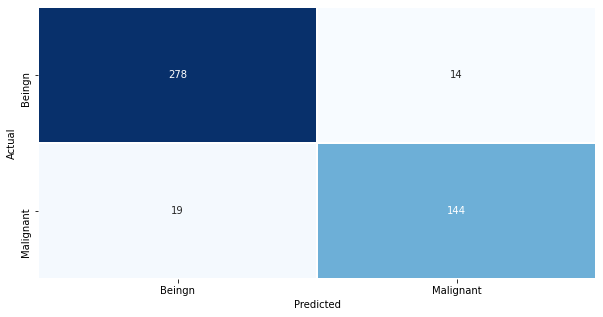

In [105]:
plt.figure(figsize=(10,5))
categories = ['Beingn', 'Malignant']
sns.heatmap(confusion,annot=True,fmt='d', cmap='Blues',linewidths=1,xticklabels=categories,yticklabels=categories,cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [106]:
print('Accuracy Score : ',accuracy_score(y_train_pred_final.Diagnosis, y_train_pred_final.Diagnosis_Prob))
print('f1 Score : ',f1_score(y_train_pred_final.Diagnosis, y_train_pred_final.Diagnosis_Prob))

Accuracy Score :  0.9274725274725275
f1 Score :  0.897196261682243


Observation:
    
- We have built a model with `Accuracy score` - `92.74%` and of `f1_score` - `89.71%`

Let's see the sensitivity and specificity values 

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))

Sensitivity :  0.8834355828220859
Specificity :  0.952054794520548


In [109]:
# Calculate false postive rate - predicting Malignant when patient does have beingn
print(FP/ float(TN+FP))

0.04794520547945205


In [112]:
# positive predictive value  and  Negative predictive value

print('positive predictive value: ',TP / float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))

positive predictive value:  0.9113924050632911
Negative predictive value:  0.936026936026936


#### Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

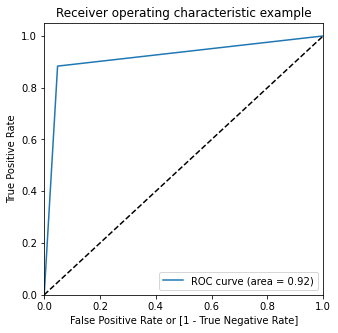

In [114]:
draw_roc(y_train_pred_final.Diagnosis, y_train_pred_final.Diagnosis_Prob)

### Predictions on Test Data

In [117]:
#filtering out the columns based on our final model 

X_test = X_test[X_train.columns]

In [118]:
#add constant to the X_test data

X_test_sm = sm.add_constant(X_test)

In [119]:
#predict the y_test values

y_test_pred = res.predict(X_test_sm)

In [120]:
# forming new dataframe holding y_test and y_test_pred values

y_pred_final = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_pred)],axis=1)

In [121]:
y_pred_final.head()

,diagnosis,0
400,1,1.00
225,0,0.05
321,1,1.00
173,0,0.00
506,0,0.09


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'diagnosis_Prob'})

In [123]:
y_pred_final['diagnosis_Prob'] = y_pred_final['diagnosis_Prob'].map(lambda x: 1 if x>0.5 else 0)

In [124]:
print('Accuracy Score : ',accuracy_score(y_pred_final.diagnosis, y_pred_final.diagnosis_Prob))
print('f1 Score : ',f1_score(y_pred_final.diagnosis, y_pred_final.diagnosis_Prob))

Accuracy Score :  0.9385964912280702
f1 Score :  0.9263157894736843


#### confusion Matrix

In [125]:
#build confusion matrix using confusion_matrix from sklearn.metrics
confusion = confusion_matrix(y_pred_final.diagnosis, y_pred_final.diagnosis_Prob)

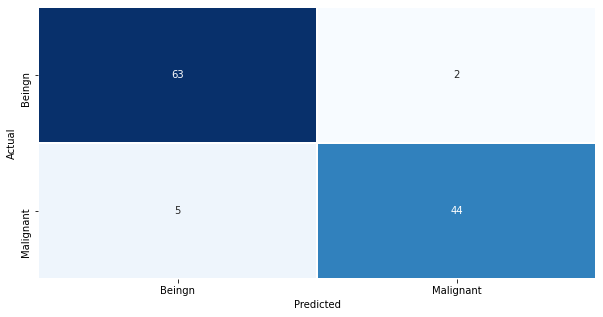

In [126]:
plt.figure(figsize=(10,5))
categories = ['Beingn', 'Malignant']
sns.heatmap(confusion,annot=True,fmt='d', cmap='Blues',linewidths=1,xticklabels=categories,yticklabels=categories,cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8979591836734694

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9692307692307692